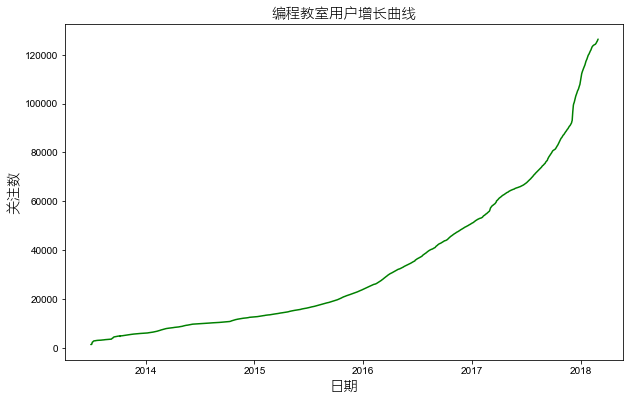

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import datetime

x_data = []
y_data = []
with open('crossin-data.txt') as f:
    for line in f:
        k, v = line.split()
        x_data.append(datetime.datetime.strptime(k,'%m/%d/%y'))
        y_data.append(v)
plt.figure(figsize=(10, 6.18))
myfont = matplotlib.font_manager.FontProperties(fname='STHeitik-Light.ttc', size=14) # 为了显示中文
plt.title(u'编程教室用户增长曲线', fontproperties=myfont) 
plt.xlabel(u'日期', fontproperties=myfont)  
plt.ylabel(u'关注数', fontproperties=myfont) 
plt.style.use("seaborn-whitegrid")
plt.plot(x_data, y_data,'g')
plt.show()

           4             3          2
3.231e-08 x - 6.945e-05 x + 0.0682 x - 6.821 x + 4855
4次多项式拟合: 2636.7070615800226 1957.38665571 0.992268924645
2021-03-12 00:00:00

           5             4             3         2
1.063e-10 x - 4.202e-07 x + 0.0006154 x - 0.369 x + 99.41 x - 1150
5次多项式拟合: 1901.3424399387247 1519.0128418 0.995979900279
2019-12-12 00:00:00

           6             5             4            3          2
2.068e-13 x - 9.501e-10 x + 1.624e-06 x - 0.001241 x + 0.4206 x - 34.82 x + 4261
6次多项式拟合: 1143.1473206979356 748.087476309 0.998546816201
2019-05-16 00:00:00

           7             6             5             4             3
1.799e-16 x - 8.654e-13 x + 1.578e-09 x - 1.365e-06 x + 0.0006094 x
           2
 - 0.1459 x + 36.46 x + 2110
7次多项式拟合: 994.0367305757893 507.138905218 0.99890119404
2019-03-06 00:00:00

            8             7             6             5             4
-1.462e-20 x + 2.795e-16 x - 1.142e-12 x + 1.982e-09 x - 1.696e-06 x
              3  

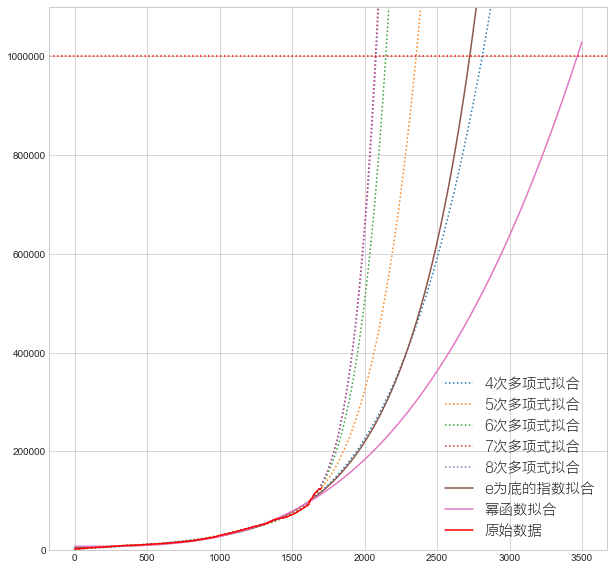

2020-05-27 00:00:00


In [15]:
import numpy as np
from scipy.optimize import leastsq
from sklearn import metrics
from math import sqrt

x_np = np.array([(d - x_data[0]).days for d in x_data])
y_np = np.array(y_data).astype(np.int64)
x_fit = np.array(range(1, 3500))

plt.figure(figsize=(10, 10))
axes = plt.gca()
axes.set_ylim([0, 1100000])

n = 0

for k in range(4, 9):
    coeff = np.polyfit(x_np, y_np, k)
    poly = np.poly1d(coeff)
    print(poly)

    y_fit = poly(x_fit)
    plt.plot(x_fit, y_fit, ':', label='%d次多项式拟合' % k)

    rmse = sqrt(metrics.mean_squared_error(y_np, poly(x_np)))
    mae = metrics.mean_absolute_error(y_np, poly(x_np))
    r2 = metrics.r2_score(y_np, poly(x_np))
    print('%d次多项式拟合:' % k, rmse, mae, r2)    
    try:
        day100 = np.where(y_fit > 1000000)[0][0]
        n += day100
        print(datetime.timedelta(days=int(day100)) + x_data[0])
    except:
        print('没达到')
    print()

# exp^x
def func_exp(x, p):
    a,b,c = p
    return a * np.exp(b * x) + c

# x^a
def func_pow(x, p):
    a,b,c = p
    return a * x ** b + c

def fit(func, pe, title):
    global n
    def residuals(p, y, x):
        return y - func(x, p)

    plsq = leastsq(residuals, pe, args=(y_np, x_np))
    print(plsq)
    
    y_fit = func(x_fit, plsq[0])
    plt.plot(x_fit, y_fit, label=title)

    rmse = sqrt(metrics.mean_squared_error(y_np, func(x_np, plsq[0])))
    mae = metrics.mean_absolute_error(y_np, func(x_np, plsq[0]))
    r2 = metrics.r2_score(y_np, func(x_np, plsq[0]))
    print(title, rmse, mae, r2)
    day100 = np.where(y_fit > 1000000)[0][0]
    n += day100
    print(datetime.timedelta(days=int(day100)) + x_data[0])
    print()

fit(func_exp, [1, 0.0001, 1], 'e为底的指数拟合')
fit(func_pow, [1, 1, 1], '幂函数拟合')

# 原曲線
plt.plot(x_np, y_np, 'r', label='原始数据')
plt.axhline(1000000, ls=':', color='r')
plt.legend(prop=myfont)
plt.show()
print(datetime.timedelta(days=int(n/7)) + x_data[0])
